# Laboratorio 3
## Recurrent Neural Network (RNN)
### Roberto Rios 20979
### Javier Mombiela 20067

In [15]:
#importando librerias
import math
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [16]:
# definimos las funciones a utilizar

# create_RNN: funcion que crea una red neuronal recurrente
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(
        hidden_units
        , input_shape=input_shape
        , activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# get_train_test: funcion que obtiene los datos de entrenamiento y prueba
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# get_XY: funcion que obtiene los datos de entrada y salida
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

In [17]:
# definimos los datos de entrenamiento y test
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

# definimos el numero de pasos de tiempo
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# definimos el modelo
model = create_RNN(
    hidden_units=3
    , dense_units=1
    , input_shape=(time_steps,1)
    , activation=['tanh', 'tanh']
)
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.0726 - 984ms/epoch - 5ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0220 - 273ms/epoch - 1ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0136 - 273ms/epoch - 1ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0093 - 274ms/epoch - 1ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0076 - 265ms/epoch - 1ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0065 - 264ms/epoch - 1ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0058 - 267ms/epoch - 1ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0055 - 305ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0051 - 276ms/epoch - 1ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0049 - 278ms/epoch - 1ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0048 - 281ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0047 - 284ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0046 - 282ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0046 - 316ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0045 - 269ms/epoch - 1ms/step
Epoch 16/20
187/187 - 0s - loss: 0

In [18]:
# definimos las funciones de los resultados

# print_error: imprime el error de las predicciones
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# plot_result: grafica los resultados
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

In [19]:
# hacemos predicciones
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# imprime el error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 2ms/step
Train RMSE: 0.065 RMSE
Test RMSE: 0.103 RMSE


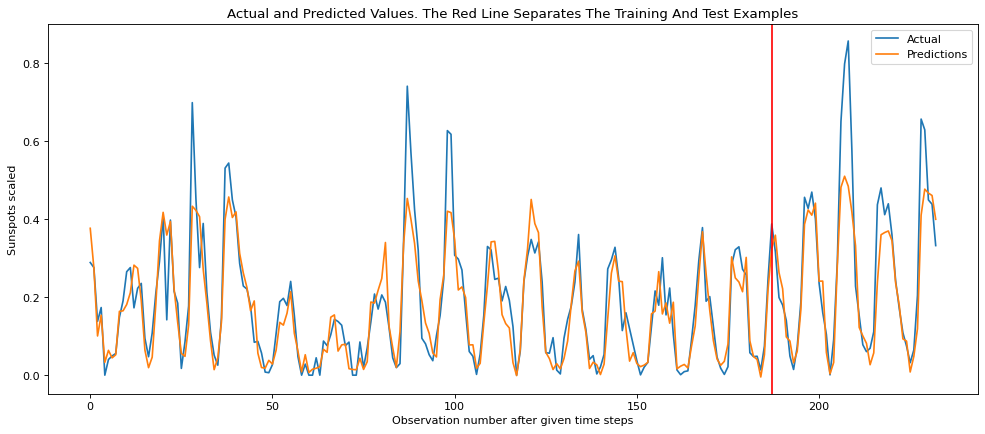

In [20]:
# graficamos los resultados de la red neuronal
plot_result(trainY, testY, train_predict, test_predict)